# Data properties

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [97]:
nums = ['age','bmi','children','charges']
cats = ['sex','smoker','region']

In [98]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [99]:
df[cats].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [100]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1188,43,female,25.270,1,yes,northeast,21771.34230
238,19,male,29.070,0,yes,northwest,17352.68030
1178,23,female,34.865,0,no,northeast,2899.48935
253,27,male,30.300,3,no,southwest,4260.74400
980,54,male,25.460,1,no,northeast,25517.11363


# 1. Analisa Descriptive Statistics

In [101]:
# 1.1 Rata-rata umur pengguna
df.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [102]:
# 1.2 Rata-rata nilai BMI dari pengguna yang merokok
df.groupby(['smoker']).mean()[['bmi']]

,bmi
smoker,
no,30.651795
yes,30.708449


In [103]:
# 1.3 Rata rata umur pengguna yang merokok
df.groupby(['smoker']).mean()[['age']]

,age
smoker,
no,39.385338
yes,38.514599


In [104]:
# 1.4 Rata rata nilai BMI dari yang merokok ? (sama dgn 1.2)
df.groupby(['smoker']).mean()[['bmi']]

,bmi
smoker,
no,30.651795
yes,30.708449


In [105]:
# 1.5 Variansi dari data charges perokok dan non perokok
df.groupby(['smoker']).var()[['charges']]

,charges
smoker,
no,3.592542e+07
yes,1.332073e+08


In [106]:
# 1.6 Rata rata umur perempuan dan laki-laki yang merokok
df.groupby(['sex','smoker']).mean()[['age']]

age
sex    smoker           
female no      39.691042
       yes     38.608696
male   no      39.061896
       yes     38.446541

In [107]:
# 1.7 Rata rata tagihan kesehatan perokok VS. non merokok
df.groupby(['smoker']).mean()[['charges']]

,charges
smoker,
no,8434.268298
yes,32050.231832


In [108]:
# 1.8 Rata rata tagihan kesehatan perokok BMI >25 VS. non perokok BMI >25
df_bmi_tinggi = df.copy()
df_bmi_tinggi = df_bmi_tinggi[df_bmi_tinggi['bmi'] > 25]
df_bmi_tinggi

df_bmi_tinggi.groupby(['smoker']).mean()[['charges']]

,charges
smoker,
no,8629.589610
yes,35116.909657


In [109]:
# 1.9 rata-rata BMI laki-laki VS. perempuan

In [110]:
df.groupby(['sex']).mean()[['bmi']]

,bmi
sex,
female,30.377749
male,30.943129


In [111]:
# 1.10 rata-rata BMI perokok VS. non perokok

In [112]:
df.groupby(['smoker']).mean()[['bmi']]

,bmi
smoker,
no,30.651795
yes,30.708449


# 2. Analisa Variabel Kategorik (PMF)

In [113]:
# 2.1 Gender dengan tagihan paling tinggi
df.groupby(['sex']).sum()[['charges']] # jumlah

,charges
sex,
female,8.321061e+06
male,9.434764e+06


In [114]:
df.groupby(['sex']).mean()[['charges']] # rata-rata

,charges
sex,
female,12569.578844
male,13956.751178


In [115]:
df.sort_values( ['charges'] , ascending=False).head() # pengguna terbesar

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209


In [116]:
# 2.2 Distribusi peluang tagihan di tiap-tiap region
df_prob_by_region = df.groupby(['region']).sum()[['charges']]
df_prob_by_region

df_prob_by_region = df_prob_by_region.reset_index()
df_prob_by_region

df_prob_by_region['total_charges'] = df_prob_by_region['charges'].sum()
df_prob_by_region

df_prob_by_region['probability'] = df_prob_by_region['charges'] / df_prob_by_region['total_charges'] 
df_prob_by_region

,region,charges,total_charges,probability
0,northeast,4.343669e+06,1.775582e+07,0.244633
1,northwest,4.035712e+06,1.775582e+07,0.227289
2,southeast,5.363690e+06,1.775582e+07,0.302081
3,southwest,4.012755e+06,1.775582e+07,0.225997


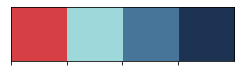

In [117]:
flatui = ["#d64045", "#9ed8db", "#467599", "#1d3354"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

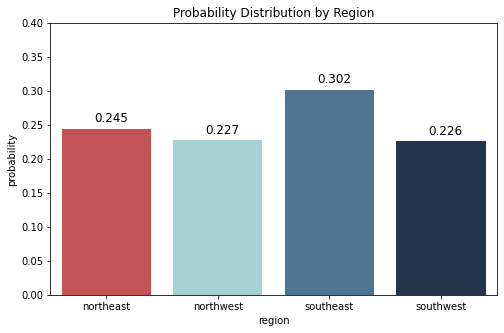

,charges,total_charges,probability
count,4.000000e+00,4.000000e+00,4.000000
mean,4.438956e+06,1.775582e+07,0.250000
std,6.346825e+05,0.000000e+00,0.035745
min,4.012755e+06,1.775582e+07,0.225997
25%,4.029973e+06,1.775582e+07,0.226966
50%,4.189690e+06,1.775582e+07,0.235961
75%,4.598674e+06,1.775582e+07,0.258995
max,5.363690e+06,1.775582e+07,0.302081


In [118]:
sns.set_palette(flatui)

plt.figure(figsize=(8,5))
sns.barplot(x='region', y='probability', data=df_prob_by_region, palette=sns.color_palette())

x = df_prob_by_region['region']
y = df_prob_by_region['probability']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.112, y = y[i]+0.01, s = round(y[i], 3), size = 12) # add data points
    
plt.ylim(0, 0.4);
plt.title('Probability Distribution by Region')
plt.show()

df_prob_by_region.describe()

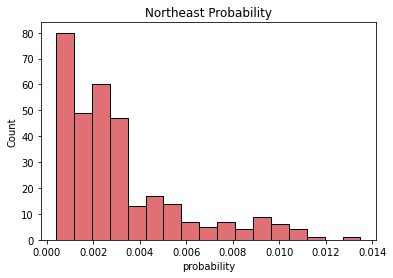

,charges,total_charges,probability
count,324.000000,3.240000e+02,324.000000
mean,13406.384516,4.343669e+06,0.003086
std,11255.803066,2.798289e-09,0.002591
min,1694.796400,4.343669e+06,0.000390
25%,5194.322288,4.343669e+06,0.001196
50%,10057.652025,4.343669e+06,0.002315
75%,16687.364100,4.343669e+06,0.003842
max,58571.074480,4.343669e+06,0.013484


In [119]:
P_NE = df[df['region'] == 'northeast']
P_NE = P_NE.drop(columns=['age', 'sex' ,'bmi', 'children', 'smoker' ])

P_NE['total_charges'] = P_NE['charges'].sum()
P_NE

P_NE['probability'] = P_NE['charges'] / P_NE['total_charges'] 
P_NE

sns.histplot(data = P_NE, x='probability', color='#d64045')
plt.title('Northeast Probability')
plt.show()

P_NE.describe()

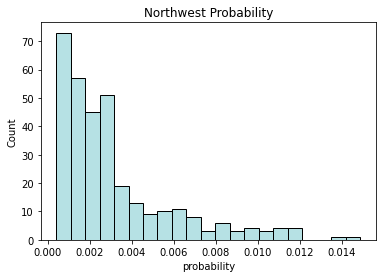

,charges,total_charges,probability
count,325.000000,3.250000e+02,325.000000
mean,12417.575374,4.035712e+06,0.003077
std,11072.276928,5.130173e-09,0.002744
min,1621.340200,4.035712e+06,0.000402
25%,4719.736550,4.035712e+06,0.001169
50%,8965.795750,4.035712e+06,0.002222
75%,14711.743800,4.035712e+06,0.003645
max,60021.398970,4.035712e+06,0.014873


In [120]:
P_NW = df[df['region'] == 'northwest']
P_NW = P_NW.drop(columns=['age', 'sex' ,'bmi', 'children', 'smoker' ])

P_NW['total_charges'] = P_NW['charges'].sum()
P_NW

P_NW['probability'] = P_NW['charges'] / P_NW['total_charges'] 
P_NW

sns.histplot(data = P_NW, x='probability', color='#9ed8db')
plt.title('Northwest Probability')
plt.show()

P_NW.describe()

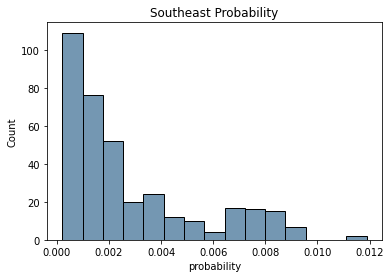

,charges,total_charges,probability
count,364.000000,3.640000e+02,364.000000
mean,14735.411438,5.363690e+06,0.002747
std,13971.098589,2.051730e-08,0.002605
min,1121.873900,5.363690e+06,0.000209
25%,4440.886200,5.363690e+06,0.000828
50%,9294.131950,5.363690e+06,0.001733
75%,19526.286900,5.363690e+06,0.003640
max,63770.428010,5.363690e+06,0.011889


In [121]:
P_SE = df[df['region'] == 'southeast']
P_SE = P_SE.drop(columns=['age', 'sex' ,'bmi', 'children', 'smoker' ])

P_SE['total_charges'] = P_SE['charges'].sum()
P_SE

P_SE['probability'] = P_SE['charges'] / P_SE['total_charges'] 
P_SE

sns.histplot(data = P_SE, x='probability', color='#467599')
plt.title('Southeast Probability')
plt.show()

P_SE.describe()

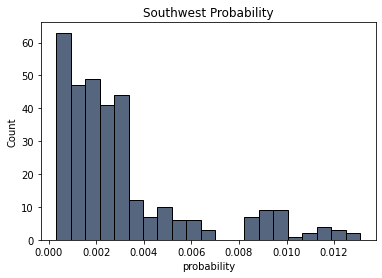

,charges,total_charges,probability
count,325.000000,3.250000e+02,325.000000
mean,12346.937377,4.012755e+06,0.003077
std,11557.179101,1.772242e-08,0.002880
min,1241.565000,4.012755e+06,0.000309
25%,4751.070000,4.012755e+06,0.001184
50%,8798.593000,4.012755e+06,0.002193
75%,13462.520000,4.012755e+06,0.003355
max,52590.829390,4.012755e+06,0.013106


In [122]:
P_SW = df[df['region'] == 'southwest']
P_SW = P_SW.drop(columns=['age', 'sex' ,'bmi', 'children', 'smoker' ])

P_SW['total_charges'] = P_SW['charges'].sum()
P_SW

P_SW['probability'] = P_SW['charges'] / P_SW['total_charges'] 
P_SW

sns.histplot(data = P_SW, x='probability', color='#1d3354')
plt.title('Southwest Probability')
plt.show()

P_SW.describe()

In [123]:
# 2.3 Proporsi data tiap region
df_proportion = df.groupby(['region']).count()[['charges']]
df_proportion

df_proportion = df_proportion.reset_index()
df_proportion

df_proportion['total_charges'] = df_proportion['charges'].sum()
df_proportion

df_proportion['proportion'] = (df_proportion['charges'] / df_proportion['total_charges'])*100
df_proportion

,region,charges,total_charges,proportion
0,northeast,324,1338,24.215247
1,northwest,325,1338,24.289985
2,southeast,364,1338,27.204783
3,southwest,325,1338,24.289985


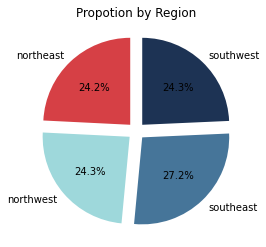

In [124]:
plt.title('Propotion by Region')
plt.pie(df_proportion['proportion'], labels = df_proportion['region'],
       autopct='%1.1f%%', explode=[0.1,0.1,0.1,0.1], startangle=90)


plt.show() 

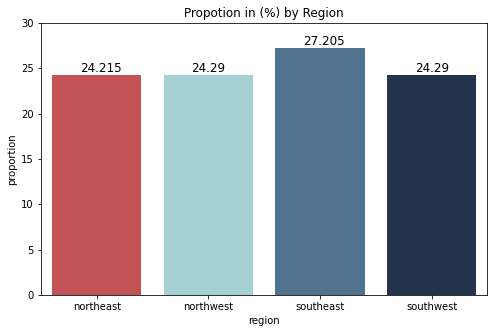

In [125]:
sns.set_palette(flatui)

plt.figure(figsize=(8,5))
sns.barplot(x='region', y='proportion', data=df_proportion, palette=sns.color_palette())

x = df_proportion['region']
y = df_proportion['proportion']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.15, y = y[i]+0.37, s = round(y[i], 3), size = 12) # add data points
    
plt.ylim(0, 30);
plt.title('Propotion in (%) by Region')
plt.show()

In [126]:
# 2.4 Proporsi perokok VS. non perokok
df_smoke_VS_non = df.groupby(['smoker']).count()[['charges']]
df_smoke_VS_non

df_smoke_VS_non = df_smoke_VS_non.reset_index()
df_smoke_VS_non

df_smoke_VS_non['total_charges'] = df_smoke_VS_non['charges'].sum()
df_smoke_VS_non

df_smoke_VS_non['smoke_prop'] = (df_smoke_VS_non['charges'] / df_smoke_VS_non['total_charges'])*100
df_smoke_VS_non

,smoker,charges,total_charges,smoke_prop
0,no,1064,1338,79.521674
1,yes,274,1338,20.478326


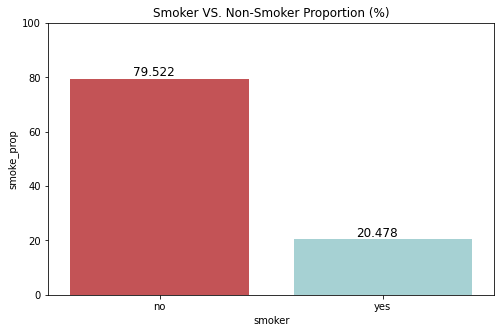

In [127]:
plt.figure(figsize=(8,5))
sns.barplot(x='smoker', y='smoke_prop', data=df_smoke_VS_non, palette=sns.color_palette())


x = df_smoke_VS_non['smoker']
y = df_smoke_VS_non['smoke_prop']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.12, y = y[i]+1, s = round(y[i], 3), size = 12) # add data points
    
plt.ylim(0, 100);
plt.title('Smoker VS. Non-Smoker Proportion (%)')
plt.show()

In [128]:
# 2.5 Peluang perempuan diketahui dia perokok
df.groupby(['sex','smoker']).count()[['charges']]

charges
sex    smoker         
female no          547
       yes         115
male   no          517
       yes         159

In [129]:
115/662

0.17371601208459214

In [130]:
# 2.6 Peluang laki-laki diketahui dia perokok
df.groupby(['sex','smoker']).count()[['charges']]

charges
sex    smoker         
female no          547
       yes         115
male   no          517
       yes         159

In [131]:
159/676

0.23520710059171598

In [132]:
# 2.7 Bentuk distribusi tagihan tiap-tiap region
df.groupby(['region']).count()[['charges']]

,charges
region,
northeast,324
northwest,325
southeast,364
southwest,325


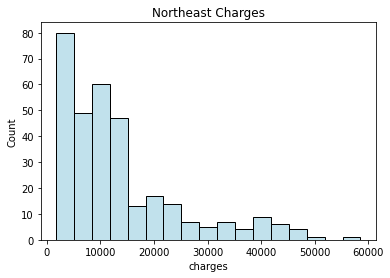

,charges
count,324.000000
mean,13406.384516
std,11255.803066
min,1694.796400
25%,5194.322288
50%,10057.652025
75%,16687.364100
max,58571.074480


In [133]:
northeast = df[df['region'] == 'northeast']
northeast = northeast.drop(columns=['age', 'sex' ,'bmi', 'children', 'smoker' ])

sns.histplot(data = northeast, x='charges', color='lightblue')
plt.title('Northeast Charges')
plt.show()

northeast.describe()

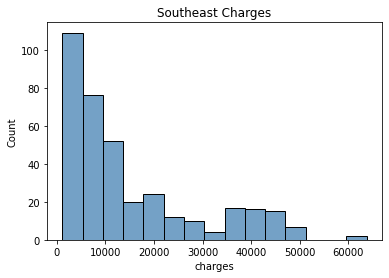

,charges
count,364.000000
mean,14735.411438
std,13971.098589
min,1121.873900
25%,4440.886200
50%,9294.131950
75%,19526.286900
max,63770.428010


In [134]:
southeast = df[df['region'] == 'southeast']
southeast = southeast.drop(columns=['age', 'sex' ,'bmi', 'children', 'smoker' ])

sns.histplot(data = southeast, x='charges', color='steelblue')
plt.title('Southeast Charges')
plt.show()

southeast.describe()

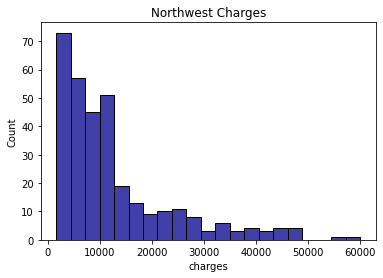

,charges
count,325.000000
mean,12417.575374
std,11072.276928
min,1621.340200
25%,4719.736550
50%,8965.795750
75%,14711.743800
max,60021.398970


In [135]:
northwest = df[df['region'] == 'northwest']

northwest = northwest.drop(columns=['age', 'sex' ,'bmi', 'children', 'smoker' ])

sns.histplot(data = northwest, x='charges', color='darkblue')
plt.title('Northwest Charges')
plt.show()

northwest.describe()

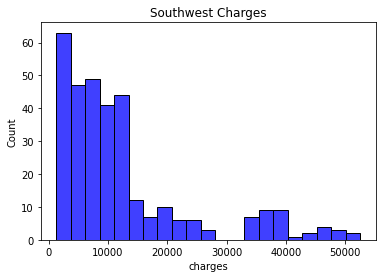

,charges
count,325.000000
mean,12346.937377
std,11557.179101
min,1241.565000
25%,4751.070000
50%,8798.593000
75%,13462.520000
max,52590.829390


In [136]:
southwest = df[df['region'] == 'southwest']

southwest = southwest.drop(columns=['age', 'sex' ,'bmi', 'children', 'smoker' ])

sns.histplot(data = southwest, x='charges', color='blue')
plt.title('Southwest Charges')
plt.show()

southwest.describe()

In [137]:
chargesNE = northeast['charges']
chargesNW = northwest['charges']
chargesSE = southeast['charges']
chargesSW = southwest['charges']

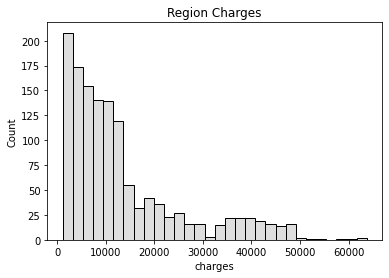

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [138]:
#ax.plot(chargesNE.count(), chargesNE, color ='blue')

region = df.drop(columns=['age', 'sex' ,'bmi', 'children', 'smoker' ])
region

sns.histplot(data = region, x='charges', color='lightgrey')
plt.title('Region Charges')
plt.show()

df.describe()

# 3. Analisa Variabel Kontinu (CFD)

In [139]:
# 3.1 Peluang besar tagihan berdasarkan BMI
df_prob_by_bmi = df.groupby(['bmi']).sum()[['charges']]
df_prob_by_bmi

df_prob_by_bmi = df_prob_by_bmi.reset_index()
df_prob_by_bmi

df_prob_by_bmi['total_charges'] = df_prob_by_bmi['charges'].sum()
df_prob_by_bmi

df_prob_by_bmi['probability'] = df_prob_by_bmi['charges'] / df_prob_by_bmi['total_charges']
df_prob_by_bmi

,bmi,charges,total_charges,probability
0,15.960,1694.79640,1.775582e+07,0.000095
1,16.815,9808.00070,1.775582e+07,0.000552
2,17.195,14455.64405,1.775582e+07,0.000814
3,17.290,23440.06030,1.775582e+07,0.001320
4,17.385,2775.19215,1.775582e+07,0.000156
...,...,...,...,...
543,48.070,9432.92530,1.775582e+07,0.000531
544,49.060,11381.32540,1.775582e+07,0.000641
545,50.380,2438.05520,1.775582e+07,0.000137
546,52.580,44501.39820,1.775582e+07,0.002506


In [140]:
# 3.2 Kemungkinan seorang perokok dengan BMI > 25 akan mendapatkan tagihan kesehatan > 16.700
df_3_02 = df[(df['bmi'] > 25.000) & (df['charges'] > 16700.0)]
df_3_02

df_3_02.groupby(['smoker']).count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,68,68,68,68,68,68
yes,215,215,215,215,215,215


In [141]:
215 / (28+215)

0.8847736625514403

In [142]:
# 3.3 Peluang seseorang tagihan kesehatannya > 16.7k diketahui dia adalah perokok
df_3_03 = df[(df['charges'] > 16700.0)]
df_3_03

df_3_03.groupby(['smoker']).count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,80,80,80,80,80,80
yes,254,254,254,254,254,254


In [143]:
254 / (254+80)

0.7604790419161677

In [144]:
# 3.4 Peluang seseorang mendapat tagihan kesehatan > 16.7k, dengan BMI > 25 VS. BMI < 25 
df_3_04_1 = df[(df['bmi'] > 25.000) & (df['charges'] > 16700.0)]
df_3_04_1[['charges']].count()

charges    283
dtype: int64

In [145]:
283/(283+51)

0.8473053892215568

In [146]:
df_3_04_2 = df[(df['bmi'] < 25.000) & (df['charges'] > 16700.0)]
df_3_04_2[['charges']].count()

charges    51
dtype: int64

In [147]:
51/(283+51)

0.15269461077844312

In [148]:
# 3.5 Peluang Seseorang dengan BMI > 25 mendapatkan tagihan kesehatan > 16.7k, perokok VS. non perokok
df_3_05 = df[(df['bmi'] > 25.000) & (df['charges'] > 16700.0)]

df_3_05.groupby(['smoker']).count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,68,68,68,68,68,68
yes,215,215,215,215,215,215


In [149]:
28 / (28+215)

0.11522633744855967

In [150]:
215 / (28+215)

0.8847736625514403

# 4. Analisa Korelasi Variabel

C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

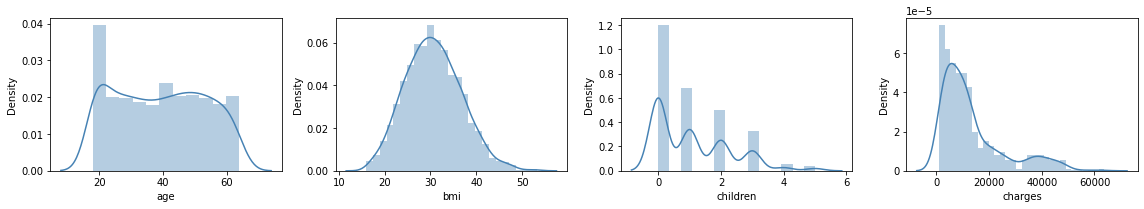

In [151]:
plt.figure(figsize=(16,8))
for i in range(0, len(nums)):
  plt.subplot(3, 4, i+1)
  sns.distplot(df[nums[i]], color = 'steelblue')
  plt.tight_layout()

C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\fahrizan rasyad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


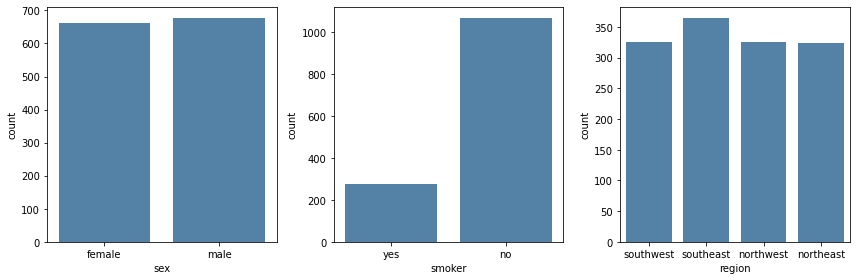

In [152]:
plt.figure(figsize=(12,4))
for i in range(0, len(cats)):
  plt.subplot(1, len(cats), i+1)
  sns.countplot(df[cats[i]], color = 'steelblue', orient = 'v')
  plt.tight_layout()

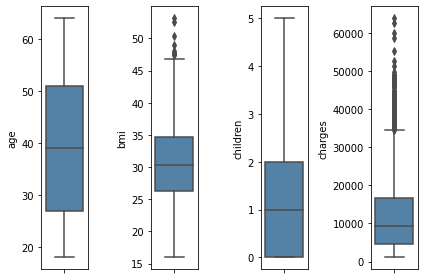

In [153]:
plt.figure(figsize=(6,4))
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.boxplot(y = df[nums[i]], color = 'steelblue', orient='v')
  plt.tight_layout()

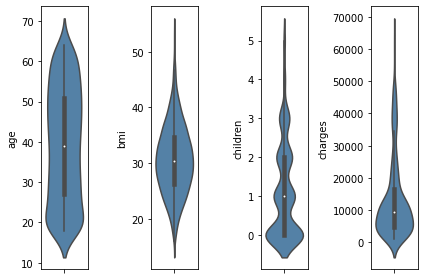

In [154]:
plt.figure(figsize=(6,4))
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.violinplot(y = df[nums[i]], color = 'steelblue', orient = 'v')
  plt.tight_layout()

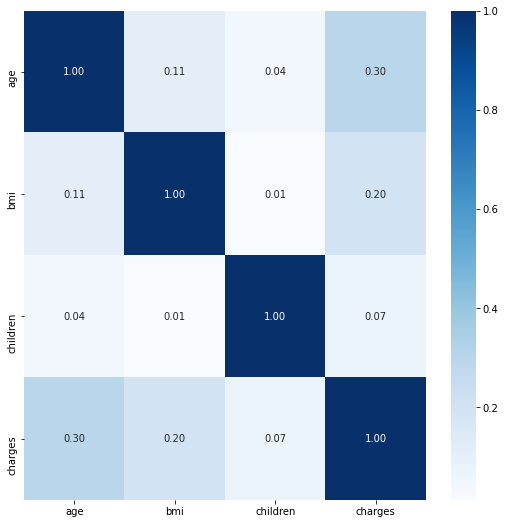

In [155]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), cmap='Blues',annot = True, fmt = '.2f')
plt.show()

In [156]:
# modifikasi kolom kategorik
cats

df_4 = df.copy()
df_4
for i in cats:
    onehots= pd.get_dummies(df_4[cats], prefix = 'cat')
    df_4final = df_4.join(onehots)

In [157]:
df_4final = df_4final.drop(columns=cats).copy()
df_4final.head()

,age,bmi,children,charges,cat_female,cat_male,cat_no,cat_yes,cat_northeast,cat_northwest,cat_southeast,cat_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


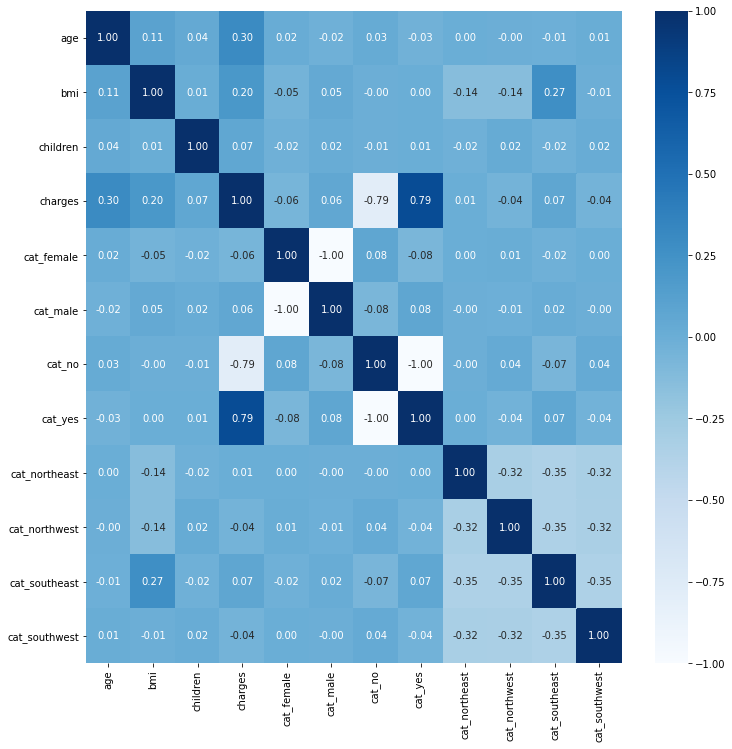

In [158]:
plt.figure(figsize=(12,12))
sns.heatmap(df_4final.corr(), cmap='Blues',annot = True, fmt = '.2f')
plt.show()

Berdasarkan heatmap diatas, korelasi paling kuat dimiliki antara charges dan kolom smoker yang sudah dilakukan modifikasi. Nilai korelasi yang kuat dan negatif dimiliki oleh charges dan non smoker, sementara untuk charges dan smoker korelasinya kuat namun positif. Selain itu, age dan charges juga memiliki korelasi positif (0.3) yang relatif tidak terlalu kuat. 




# 5. Pengujian Hipotesis

In [159]:
# 5.1 Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

In [160]:
alpha = 0.05

In [161]:
df_non_smoker = df[ (df['smoker'] == 'no') ]
#df_non_smoker

non_smoker = df_non_smoker['charges'].tolist()
#non_smoker

In [162]:
df_smoker = df[ (df['smoker'] == 'yes') ]
#df_smoker

smoker = df_smoker['charges'].tolist()
#smoker

In [163]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = smoker, b = non_smoker, equal_var=False, alternative='less')

print('Statistics = %.4f, p-value = %.4f' % (stat, p))

Statistics = 32.7519, p-value = 1.0000


In [164]:
if p > alpha:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)


Maka dapat kita simpulkan bahwa tagihan kesehatan perokok sama atau lebih besar dari tagihan non-perokok.

In [165]:
# 5.2 Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

In [166]:
alpha2 = 0.05

In [167]:
df_high_bmi = df[ (df['bmi'] > 25) ]
#df_high_bmi

df_low_bmi = df[ (df['bmi'] < 25) ]
#df_low_bmi

In [168]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = df_high_bmi[['charges']], b = df_low_bmi[['charges']], equal_var=False, alternative='less')

print('Statistics = %.4f, p-value = %.4f' % (stat, p))

Statistics = 5.9299, p-value = 1.0000


In [169]:
if p > alpha2:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)


Maka dapat kita simpulkan bahwa tagihan dengan bmi diatas 25 sama atau lebih besar dari tagihan dengan bmi dibawah 25.

In [170]:
# 5.3 BMI laki-laki dan perempuan sama

In [171]:
alpha3 = 0.05

In [172]:
df_M = df[ (df['sex'] == 'male') ]
#df_M

df_F = df[ (df['sex'] == 'female') ]
#df_F

In [173]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = df_M[['bmi']], b = df_F[['bmi']], equal_var=False, alternative='two-sided')

print('Statistics = %.4f, p-value = %.4f' % (stat, p))

Statistics = 1.6970, p-value = 0.0899


In [174]:
if p > alpha3:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)


Maka dapat kita simpulkan bahwa BMI dari laki-laki dan perempuan sama.

In [175]:
# 5.4 Tagihan kesehatan laki-laki lebih besar dari perempuan

In [176]:
alpha4 = 0.05

In [177]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = df_M[['charges']], b = df_F[['charges']], equal_var=False, alternative='less')

print('Statistics = %.4f, p-value = %.4f' % (stat, p))

Statistics = 2.1009, p-value = 0.9821


In [178]:
if p > alpha4:
    print('Two group means are equal (Gagal tolak H0)') 
else:
    print('Two group means are different (Tolak H0)')

Two group means are equal (Gagal tolak H0)


Maka dapat kita simpulkan bahwa tagihan kesehatan laki-laki sama atau lebih besar dari tagihan kesehatan perempuan.